In [ ]:
# Data reading
import pandas as pd
import datetime as dt
pd.set_option('display.max_columns', None)  # Show all columns in output
pd.set_option('display.max_rows', None) # Show all rows in output
df_=pd.read_csv("/kaggle/input/online-retail-ii-uci/online_retail_II.csv")
df=df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# Descriptive statistics of the dataset.
#Transposing means interchanging rows and columns, so the resulting DataFrame will have columns as rows and rows as columns.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371.0,9.938898,172.705794,-80995.00,1.00,3.0,10.00,80995.0
Price,1067371.0,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,15324.638504,1697.464450,12346.00,13975.00,15255.0,16797.00,18287.0


In [ ]:
# Detecting null values

df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [ ]:
# Removal of the missing observations from the dataset

df.dropna(inplace=True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [ ]:
# unique product in this dataset

df.nunique()

Invoice        44876
StockCode       4646
Description     5299
Quantity         643
InvoiceDate    41439
Price           1022
Customer ID     5942
Country           41
dtype: int64

In [ ]:
# Total number of units are there for each product?


df["Description"].value_counts().head()
df["StockCode"].value_counts().head()

85123A    5322
22423     3777
85099B    3446
84879     2794
20725     2755
Name: StockCode, dtype: int64

In [ ]:
# sorting the top 5 products based on the number of orders, from highest to lowest.

df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity",ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,107489
WHITE HANGING HEART T-LIGHT HOLDER,90008
ASSORTED COLOUR BIRD ORNAMENT,79434
JUMBO BAG RED RETROSPOT,74564
BROCADE RING PURSE,70390


In [ ]:
# Please remove the canceled transactions (denoted by 'C') from the dataset.

df = df[(df['Quantity'] > 0)] #Filtering Positive Quantity
df.dropna(inplace=True)  #Dropping Rows with Missing Values
df = df[~df["Invoice"].str.contains("C", na=False)] #Removing Rows with Invoice Containing 'C'

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# 'TotalPrice' that represents the total revenue generated per invoice.


df["TotalPrice"]=df["Quantity"]*df["Price"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [ ]:
df.info() ##DataFrame's columns, the number of non-null values in each column, the data types of the columns, and memory usage.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805620 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805620 non-null  object 
 1   StockCode    805620 non-null  object 
 2   Description  805620 non-null  object 
 3   Quantity     805620 non-null  int64  
 4   InvoiceDate  805620 non-null  object 
 5   Price        805620 non-null  float64
 6   Customer ID  805620 non-null  float64
 7   Country      805620 non-null  object 
 8   TotalPrice   805620 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 61.5+ MB


In [ ]:
# changing the variable types and convert the variables representing dates to the type 'date'.

date_columns=df.columns[df.columns.str.contains("Date")] #Selecting Date Columns
df[date_columns]=df[date_columns].apply(pd.to_datetime) #Converting Columns to Datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805620 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805620 non-null  object        
 1   StockCode    805620 non-null  object        
 2   Description  805620 non-null  object        
 3   Quantity     805620 non-null  int64         
 4   InvoiceDate  805620 non-null  datetime64[ns]
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  float64       
 7   Country      805620 non-null  object        
 8   TotalPrice   805620 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 61.5+ MB


**Removing outliers**

In [ ]:
def outlier_thresholds(dataframe, variable):#function calculates the upper and lower threshold values to identify outliers in a given column of the DataFrame.
    ##Calculate the 1st percentile (quartile1) and 99th percentile (quartile3) of the column
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1   # Calculate the interquartile range (IQR) as the difference between quartile3 and quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit # Return the upper and lower threshold values

def replace_with_threshold(dataframe, variable): #replaces the outliers in a given column of the DataFrame with the calculated threshold values.
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit   #Replace the values above the upper threshold with the upper limit threshold value

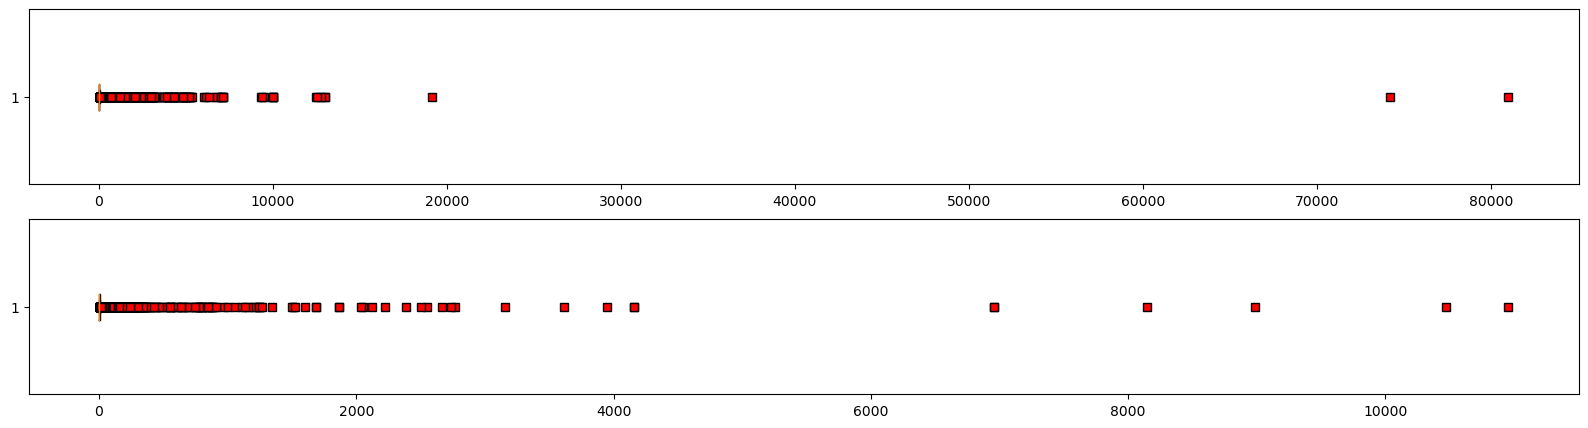

In [ ]:
f, ax = plt.subplots(2,1, figsize = (20,5))
col_list = ["Quantity","Price"]
for i in range(0,2):
    ax[i].boxplot(df[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

In [ ]:
# Applying the functions for remove the outlier.
replace_with_threshold(df, "Quantity")
replace_with_threshold(df, "Price")

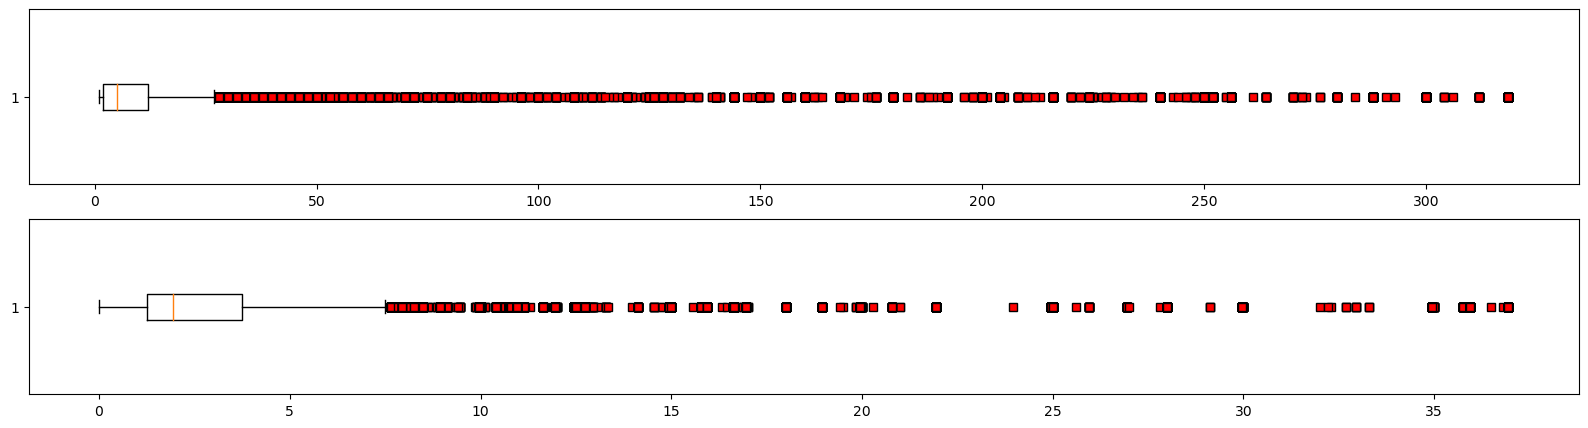

In [ ]:
# Observing them after removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
for i in range(0,2):
    ax[i].boxplot(df[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

In [ ]:
# Calculating RFM Metrics


df["InvoiceDate"].max() #
type("InvoiceDate")
analysis_date = dt.datetime(2011, 12, 11)
type(analysis_date)

rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (analysis_date - InvoiceDate.max()).days, #recency
                                     'Invoice': lambda Invoice: Invoice.nunique(), #frequency
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})  #monetary

rfm.columns = ['recency', 'frequency', 'monetary']

rfm.head()



,recency,frequency,monetary
Customer ID,,,
12346.0,326,12,77556.46
12347.0,3,8,5633.32
12348.0,76,5,2019.40
12349.0,19,4,4428.69
12350.0,311,1,334.40


In [ ]:
#Creating RFM Scores and Combining Them into a Single Variable


rfm["recency_score"] = pd.qcut(rfm["recency"],5,labels=[5,4,3,2,1]) #A higher score indicates lower recency, meaning more recent purchases.
rfm["frequency_score"]= pd.qcut(rfm["frequency"].rank(method="first"),5,labels=[1,2,3,4,5]) ##A higher score indicates higher frequency, meaning more frequent transactions.
rfm["monetary_score"]= pd.qcut(rfm["monetary"],5,labels=[1,2,3,4,5])#A higher score indicates higher monetary value, meaning more money spent

rfm["RF_SCORE"]=rfm["recency_score"].astype(str)+rfm["frequency_score"].astype(str) #1st digit recency_score 2nd digit frequency_score
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
Customer ID,,,,,,,
12346.0,326,12,77556.46,2,5,5,25
12347.0,3,8,5633.32,5,4,5,54
12348.0,76,5,2019.40,3,4,4,34
12349.0,19,4,4428.69,5,3,5,53
12350.0,311,1,334.40,2,1,2,21


![](https://cdn.enhencer.com/website-assets/images/blog/AdvantagesAndInefficaciesOfRFMSegmentation1.png)

In [ ]:
# Defining RFM scores as segments


seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)
rfm.head()
rfm = rfm[["recency", "frequency", "monetary","recency_score" ,"frequency_score","RF_SCORE" , "segment"]]
rfm.head()


,recency,frequency,monetary,recency_score,frequency_score,RF_SCORE,segment
Customer ID,,,,,,,
12346.0,326,12,77556.46,2,5,25,cant_loose
12347.0,3,8,5633.32,5,4,54,champions
12348.0,76,5,2019.40,3,4,34,loyal_customers
12349.0,19,4,4428.69,5,3,53,potential_loyalists
12350.0,311,1,334.40,2,1,21,hibernating


In [ ]:
# Select the three segments that you find important. Interpret these three segments in terms of both
# actionable decisions and the structure of the segments (average RFM values).
#FILTERATION OF CUSTOMERS


rfm[rfm["segment"]=="cant_loose"].head()
#rfm.groupby("segment").agg({"RF_SCORE":"mean"})
rfm[rfm["segment"]=="about_to_sleep"].head()
rfm[rfm["segment"]=="at_risk"].head()


new_df = pd.DataFrame()
new_df["loyal_customer_id"] = rfm[rfm["segment"] == "loyal_customers"].index

new_df["loyal_customer_id"] = new_df["loyal_customer_id"].astype(int) #ondalıklardan kurtulduk

new_df.to_csv("loyal_customers.csv")
#csv ye ceviridk
rfm.to_csv("rfm.csv")  #This saves the entire RFM DataFrame to a CSV file named "rfm.csv".

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805620 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805620 non-null  object        
 1   StockCode    805620 non-null  object        
 2   Description  805620 non-null  object        
 3   Quantity     805620 non-null  int64         
 4   InvoiceDate  805620 non-null  datetime64[ns]
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  float64       
 7   Country      805620 non-null  object        
 8   TotalPrice   805620 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 61.5+ MB


In [ ]:
x=df['Quantity'].values
y=df['Price'].values
X=x.reshape(-1,1)
X

array([[12],
       [12],
       [12],
       ...,
       [ 4],
       [ 3],
       [ 1]])

****TrainTest split****

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
X_train.shape


(563934, 1)

In [ ]:
y_test.shape

(241686,)

**Building a linear model**

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
ypred=lr.predict(X_test)
ypred

array([3.19905478, 3.19905478, 3.18175366, ..., 3.19980701, 3.18250588,
       3.19905478])

**Calculating r2 value**

In [ ]:
from sklearn.metrics import r2_score
r_squared=r2_score(y_test,ypred)
r_squared

2.2455502030949148e-05

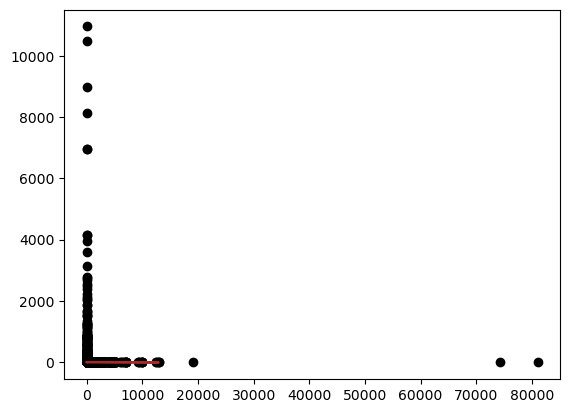

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(df['Quantity'],df['Price'],color='Black')
plt.plot(X_test,ypred,color='Brown')
plt.show()

The R squared value should be between 5 - 9.5. However, the observed R2 value is 2.25. Hence, the model is less fit which is evident from the above scatter plot.

**K-Means Clustering**

In [ ]:
df["Revenue"] = df["Quantity"] * df["Price"]

In [ ]:
print("Max date :",df["InvoiceDate"].max())
print("Min date :",df["InvoiceDate"].min())

Max date : 2011-12-09 12:50:00
Min date : 2009-12-01 07:45:00


In [ ]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09.
Latest_Date = dt.datetime(2011,12,10)

#Creating RFM features with subset of customerID
RFM = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                    'Invoice': lambda x: x.nunique(),
                                    "Revenue": lambda x: x.sum()})

RFM['InvoiceDate'] = RFM['InvoiceDate'].astype(int)

#Renaming column names to Recency, Frequency and Monetary
RFM.rename(columns={'InvoiceDate': 'Recency',
                         'Invoice': 'Frequency',
                         'Revenue': 'Monetary'}, inplace=True)
RFM.reset_index().head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Customer ID,Recency,Frequency,Monetary
0,12346.000000,325,12,704.100000
1,12347.000000,2,8,5633.320000
2,12348.000000,75,5,1991.860000
3,12349.000000,18,4,3786.500000
4,12350.000000,310,1,331.340000


In [ ]:
RFM = RFM[(RFM["Frequency"]>1)]
RFM.head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary
Customer ID,,,
12346.000000,325,12,704.100000
12347.000000,2,8,5633.320000
12348.000000,75,5,1991.860000
12349.000000,18,4,3786.500000
12352.000000,36,10,2098.940000


In [ ]:
Shopping_Cycle = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: ((x.max() - x.min()).days)})
RFM["Shopping_Cycle"] = Shopping_Cycle
RFM.head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary,Shopping_Cycle
Customer ID,,,,
12346.000000,325,12,704.100000,400
12347.000000,2,8,5633.320000,402
12348.000000,75,5,1991.860000,362
12349.000000,18,4,3786.500000,570
12352.000000,36,10,2098.940000,356


In [ ]:
RFM["Interpurchase_Time"] = RFM["Shopping_Cycle"] // RFM["Frequency"]
RFMT = RFM[["Recency","Frequency","Monetary","Interpurchase_Time"]]
RFMT.head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary,Interpurchase_Time
Customer ID,,,,
12346.000000,325,12,704.100000,33
12347.000000,2,8,5633.320000,50
12348.000000,75,5,1991.860000,72
12349.000000,18,4,3786.500000,142
12352.000000,36,10,2098.940000,35


**Modelling with KMeans Algorithm**

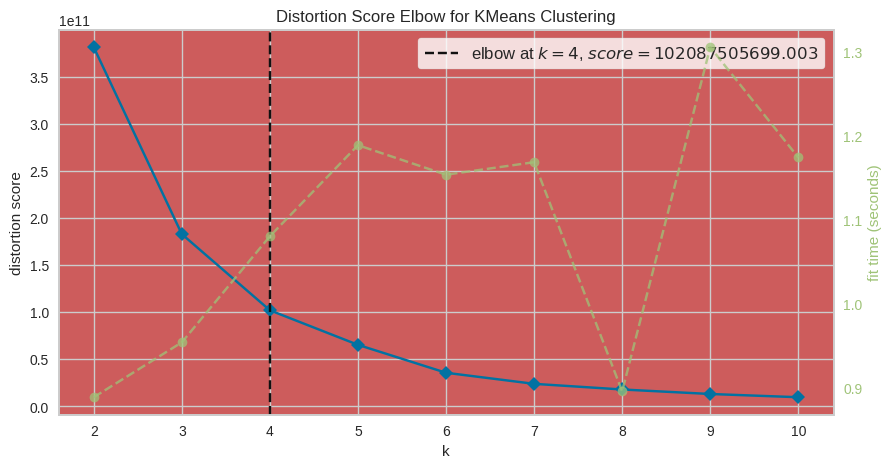

Therefore K = 4


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from numpy import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Finding initial K value using Elbow Method
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("#cd5c5c")
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(RFMT)
Elbow_M.show()
print("Therefore K = 4")

In [ ]:
#Fitting KMeans Model
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(RFMT)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
RFMT["Clusters"]=kmeans.labels_
RFMT.head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"}) # ALL Clusters 1 means they exhibit similar RFM behavior and inter-purchase time patterns based on the K-means clustering.

,Recency,Frequency,Monetary,Interpurchase_Time,Clusters
Customer ID,,,,,
12346.000000,325,12,704.100000,33,1
12347.000000,2,8,5633.320000,50,1
12348.000000,75,5,1991.860000,72,1
12349.000000,18,4,3786.500000,142,1
12352.000000,36,10,2098.940000,35,1


**Model : Evaluation**

In [ ]:
kmeans.cluster_centers_

array([[3.25000000e+01, 5.45750000e+01, 3.68835138e+04, 1.87750000e+01],
       [1.44685804e+02, 7.02786452e+00, 2.48159656e+03, 7.00518857e+01],
       [5.00000000e-01, 1.48500000e+02, 5.23970588e+05, 4.50000000e+00],
       [5.60000000e+00, 1.42900000e+02, 1.76210678e+05, 7.10000000e+00]])

<function matplotlib.pyplot.show(close=None, block=None)>

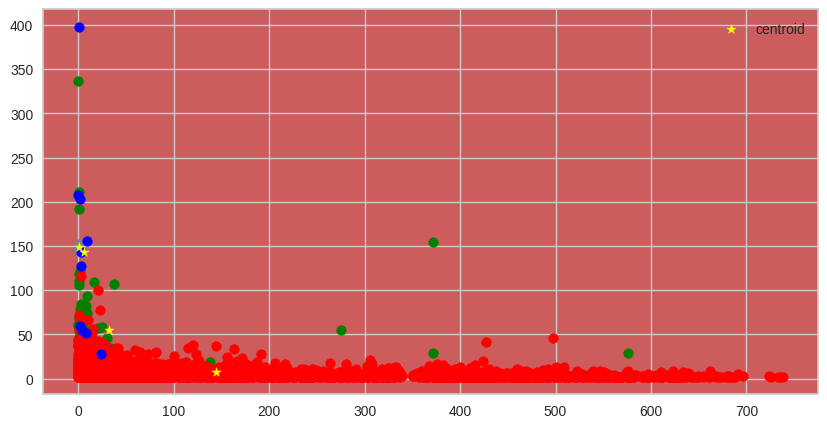

In [ ]:
# grouping the data in accorandance with each cluster seperately
one = RFMT[RFMT["Clusters"]==0]
two = RFMT[RFMT["Clusters"]==1]
three = RFMT[RFMT["Clusters"]==2]
four = RFMT[RFMT["Clusters"]==3]

#Checking the quality of clustering in the data set
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("#cd5c5c")
plt.scatter(one["Recency"],one["Frequency"],color='green')# Scatter plot for Cluster 0 (one)
plt.scatter(two["Recency"],two["Frequency"],color='red')# Scatter plot for Cluster 1 (two)
plt.scatter(three["Recency"],three["Frequency"],color='grey') # Scatter plot for Cluster 2 (three)
plt.scatter(four["Recency"],four["Frequency"],color='blue') # Scatter plot for Cluster 3 (four)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",marker="*",label="centroid") # Scatter plot for cluster centroids
plt.legend()
plt.show

In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette score :",silhouette_score(RFMT, kmeans.labels_, metric='euclidean'))
#By evaluating the Silhouette Score, you can assess the effectiveness of the K-means clustering in creating distinct and well-defined clusters based on the given feature set.

Silhouette score : 0.9019944616689637
